# En los problemas de regresion la salida del modelo o red neuronal es un numero , un ejemplo podria ser un modelo que intente predecir el valor de una casa

Ahora tenemos un problema de clasificacion, es decir si el numero de categorias posibles debe ser equivalente al numero de salidas posibles

Si tomamos una imagen a blanco y negro podemos darle un valor numerico a cada pixel
ejemplo si tomamos una imagen de 100x100 pixeles tendremos 10,000 pixeles con valores posibles de [0 a 255]

Cada pixel en un problema de clasificacion iria en una neurona distinta en la capa de entrada
# Por lo tanto
Si tenemos 10,000 pixeles tendremos 10,000 neuronas en la capa de entrada
Para optimizar esto podemos hacer las imagenes mas pequeñas


entonces seran 10,000 neuronas de entrada y 10 neuronas de salidas

# ¿Que tipo de red Neurnal vamos a utilizar?
Existen muchos tipos de modelos de redes neuronales, para este caso utilizaremos una red neuronal convolucional la cual es muy utilizada para la clasificacion de imagenes

A manera de ejemplo una red de regresion solamente resuelve ecuaciones lineales

Para resolver problemas mas complejos que no requieran soluciones lineales utilizaremos las capas ocultas y las funciones de activacion

Finalmente cuando una neurona suma su sesgo este resultado lo pasaremnos por una funcion llamada funcion de activacion , hay muchas funciones de activacion pero por ahora utilizaremos la funcion

# Funcion de activacio de ReLu
si el numero es mayor a cero, mantenlo igual, pero si el numero es menor a cero, mantenlo a cero , esta funcion no acepta numeros negativos

Este pequeño camnbio en conjunto con las capas ocultas permiten que una red aprenda a resoolver problemas no lineales

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    =

In [4]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [5]:
nombres_clases  = metadatos.features['label'].names

In [6]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Normalizar los datos quiere decir hacer que todos los datos de entrada sean numeros entre [0,1]

Para este caso pasaremos de 0-255 a 0-1

In [7]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #aqui se normalizan los datos
  return imagenes, etiquetas

# Normalizar los datos de entrenamienrto y pruebas con la funcion que hicimos
datos_entrenamiento =  datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)


### agregamos a cache para agilizar el proceso ya que guarda los datos en memoria en lugar de disco
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

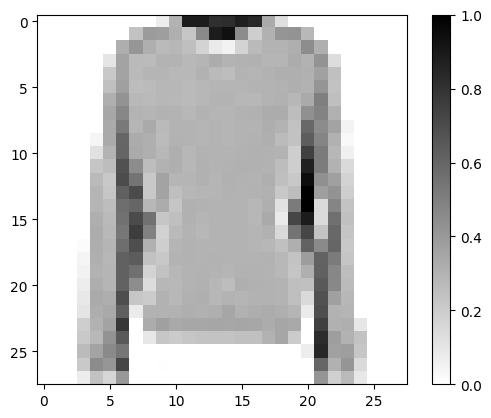

In [8]:
##Mostrar una imagen de los datos de prueba
import matplotlib.pyplot as plt

for imagen , etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

#dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

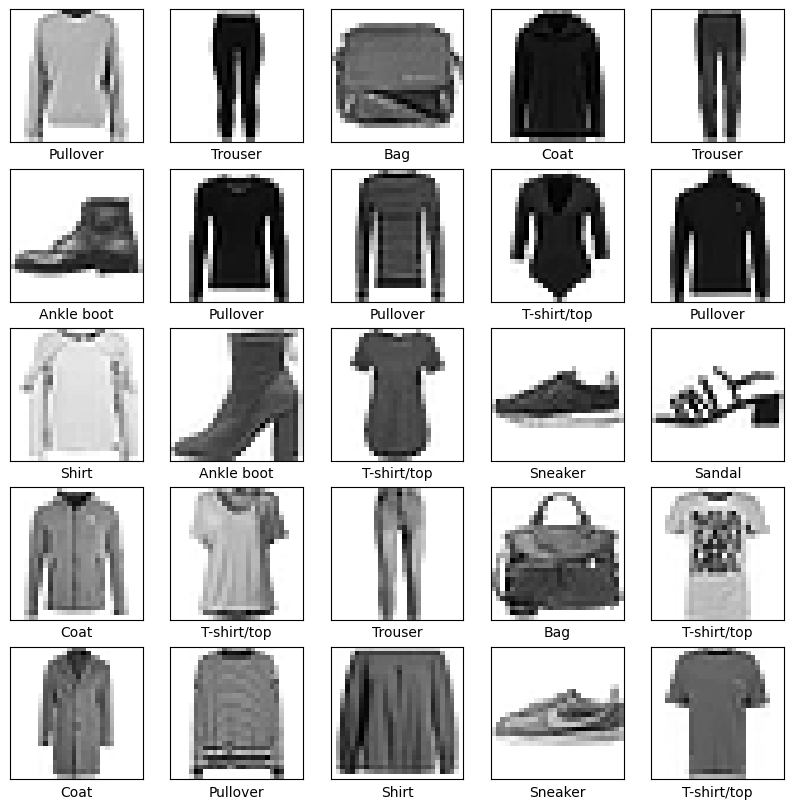

In [9]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen=imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [10]:
##DEFINIMOS MODELOS
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)) ,#la capa flatten se encarga de transformar la matriz y aplastarla en una sola dimension con 784 neuronas donde se recibira cada pixel
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # para redes de clasificacion utilizamos la funcuion de activacion softmax
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
##Compilamos el modelo
modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

In [13]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [14]:
##Para hacer que la red los entrene mas rapido podemos decirle que lo haga en lotes
TAMANO_LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [15]:
import math

#entrenar
historial = modelo.fit(datos_entrenamiento, epochs = 5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7652 - loss: 0.6664
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8591 - loss: 0.3950
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8693 - loss: 0.3579
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8761 - loss: 0.3342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8860 - loss: 0.3136


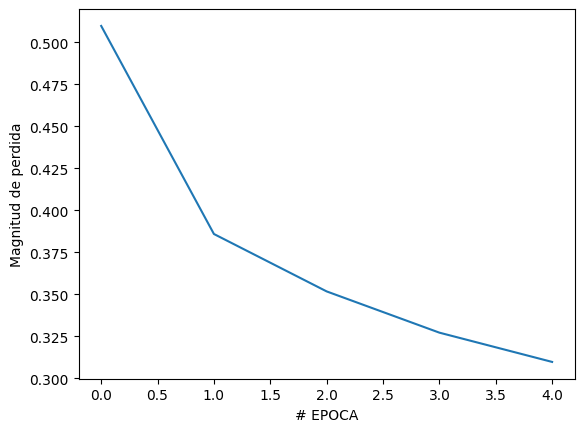

In [16]:
plt.xlabel("# EPOCA")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history['loss'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


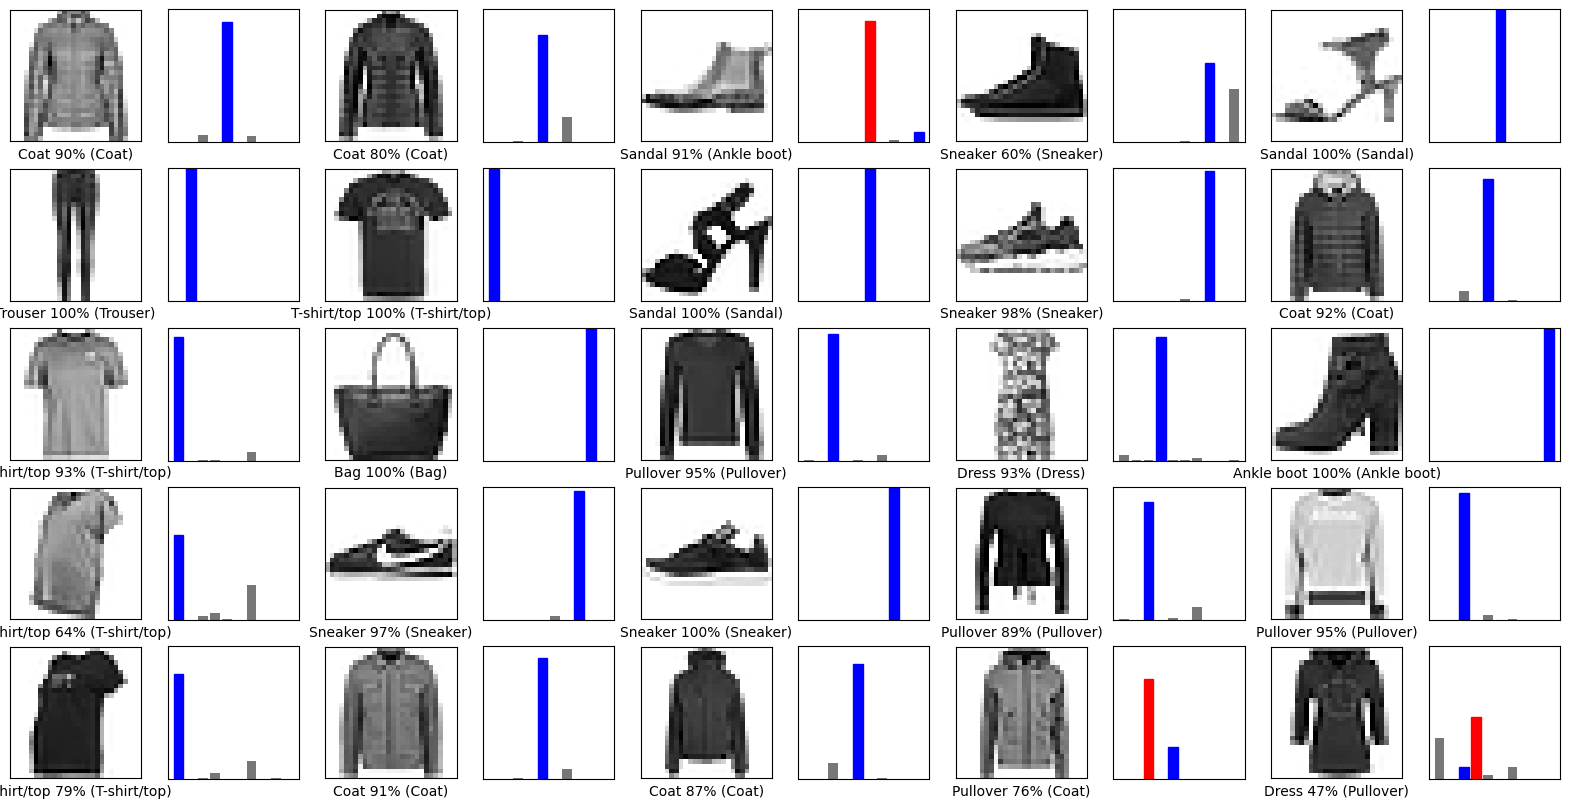

In [17]:
import numpy as np
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)


def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones,etiqueta_real, img =  arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])


  plt.imshow(img[...,0], cmap = plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue' #resultado correcto
  else:
    color = 'red' #resultado equivocado

  plt.xlabel("{} {:2.0f}% ({})".format(
      nombres_clases[etiqueta_prediccion],
      100*np.max(arr_predicciones),
      nombres_clases[etiqueta_real],
      color = color
  ))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i] ,etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color = "#777777")
    plt.ylim([0,1])

    etiqueta_prediccion =np.argmax(arr_predicciones)
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

filas  = 5
columnas = 5

num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)


In [18]:
## tomamos cualquier indice del sett de pruebas para ver su prediccion
imagen = imagenes_prueba[5]
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)
print("Prediccion " + nombres_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediccion Trouser


In [19]:
##Exportacion del modelo con tensorflor.js
modelo.save("modo_exportado.h5")

In [20]:
pip install tensorflowjs

In [21]:
## convertir archivo h5 a tensorflowjs
!mkdir  tfjs_target_dir
!tensorflowjs_converter --input_formar keras modelo_exportado.h5 tfjs_target_dir

2024-05-11 20:14:44.024717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {keras_saved_model,keras,keras_keras,tf_frozen_model,tfjs_layers_model,tf_hub,tf_saved_model}]
                                       [--output_format {keras_saved_model,keras,keras_keras,tfjs_layers_model,tfjs_graph_model}]
                                       [--signature_name SIGNATURE_NAME]
                                       [--saved_model_tags SAVED_MODEL_TAGS]
                                       [--quantize_float16 [QUANTIZE_FLOAT16]]
                                       [--quantize_uint8 [QUANTIZE_UINT8]]
                                       [--quantize_uint16 [QUANTIZE_UINT16]]
                                       [--quantization_bytes {1,2}] [--split_weights_by_layer]
                                       [--version] [--skip_op_check]
       